# Galaxia: Generating synthetic surveys

## Parameters/outputs: 

For files named test1_*, they are contained in the file $\texttt{test1parameters}$, which is located in the /u/casey_lam/scratch directory on sloop. In particular, we try to get all stars (so magnitude limits are -1000 to 1000), we want a full sky survey (so geometryOption is set to 0), and fSample is 10${}^{-6}$ such that the computer doesn't become stupid slow. 

For files named testLOS_*, they are contained in the file $\texttt{testLOSparameters}$, which is also located in /u/casey_lam/scratch. Here, we are considering the line of sight to a particular OGLE event. Again we want all stars, so magnitude limits are -1000 to 1000, the patch of sky is OGLE's field of view (35' x 35' = 0.34 deg${}^2$) so the surveyArea is set to 0.34. (The first time I ran this, I left fSample = 1 since I figured it wouldn't be that many stars... it ended up making 155 million stars, so I reran it with an fSample = 10${}^{-4}$.)

The relevant outputs are 3D position, proper motions, and brightness at several particular filters (probably R and K band.)

## Number of stars vs distance from Sun (in direction of OGLE-2017-BLG-0019)

Calculating l and b from RA and Dec for OGLE-2017-BLG-0019:

RA (J2000.0):17:52:18.74

Dec (J2000.0):-33:00:04.0

Converting into degrees: 

17 hours 52 minutes 18.74 seconds =  (17 + (52/60) + (18.74/3600))*15  deg = 268.078083 deg

-33 degrees 00 minutes 04 seconds = -(33 + (4/3600)) deg =  -33.00111 deg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import astropy.units as u
import astropy.coordinates as coord

NOTE: Below in the conversion I used ICRS coordinates. I should have used FK5 probably though. At this point it doesn't matter, but just putting this note here for future reference.

In [2]:
#convert from RA and Dec to l and b
#b is latitude, l is longitude
c = coord.SkyCoord(ra = [268.078083]*u.degree, dec = [-33.00111]*u.degree, frame='icrs')
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    [( 357.2501853, -3.32067552)]>

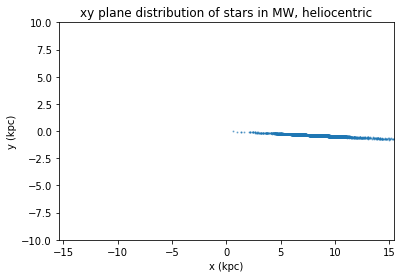

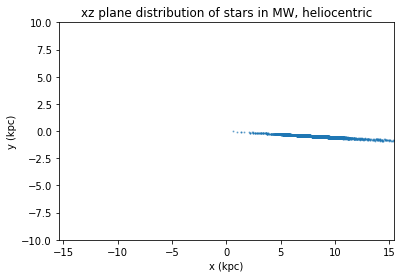

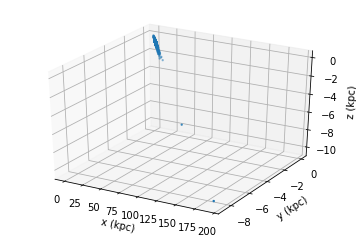

In [3]:
#load px, py, pz (cartesian heliocentric coordinates) from galaxia
HCxOGLE = np.loadtxt("testLOS_px") #kpc
HCyOGLE = np.loadtxt("testLOS_py") #kpc
HCzOGLE = np.loadtxt("testLOS_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) from galaxia
HCxvelOGLE = np.loadtxt("testLOS_vx") #km/s
HCyvelOGLE = np.loadtxt("testLOS_vy") #km/s
HCzvelOGLE = np.loadtxt("testLOS_vz") #km/s

#slice of the x-y plane
plt.plot(HCxOGLE,HCyOGLE,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("xy plane distribution of stars in MW, heliocentric")
plt.show()

#slice of the x-z plane
plt.plot(HCxOGLE,HCzOGLE,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("xz plane distribution of stars in MW, heliocentric")
plt.show()

#full 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(HCxOGLE, HCyOGLE, HCzOGLE, s = 2)

ax.set_xlabel('x (kpc)')
ax.set_ylabel('y (kpc)')
ax.set_zlabel('z (kpc)')

plt.show()

In [4]:
sun = np.loadtxt("testLOS_center") 
#first three values are positions in kpc
#last three values are velocities in km/s

GCxOGLE = HCxOGLE + sun[0]
GCyOGLE = HCyOGLE + sun[1]
GCzOGLE = HCzOGLE + sun[2]

GCxvelOGLE = HCxvelOGLE + sun[3]
GCyvelOGLE = HCyvelOGLE + sun[4]
GCzvelOGLE = HCzvelOGLE + sun[5]

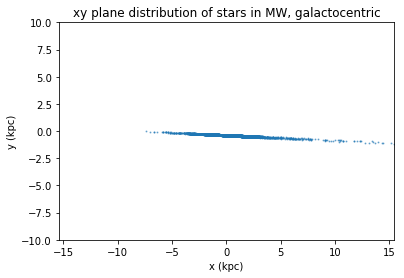

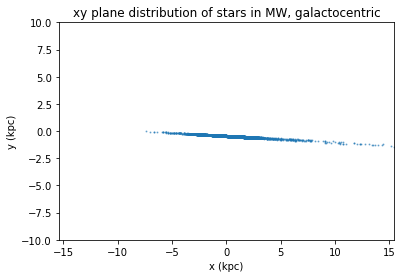

In [5]:
#slice of the x-y plane
plt.plot(GCxOGLE,GCyOGLE,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("xy plane distribution of stars in MW, galactocentric")
plt.show()

#slice of the x-z plane
plt.plot(GCxOGLE,GCzOGLE,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("xy plane distribution of stars in MW, galactocentric")
plt.show()


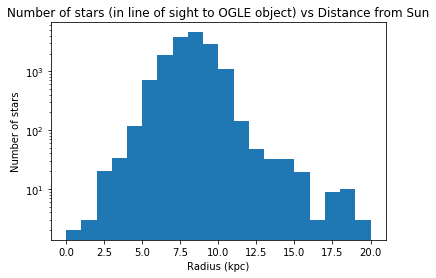

In [6]:
radiusHC = []
for i in np.arange(len(HCxOGLE)):
    radiusHC.append(np.sqrt(HCxOGLE[i]**2 + HCyOGLE[i]**2 + HCzOGLE[i]**2))
plt.hist(radiusHC,bins=np.arange(21))
plt.xlabel("Radius (kpc)")
plt.ylabel("Number of stars")
plt.title("Number of stars (in line of sight to OGLE object) vs Distance from Sun")
plt.yscale('log')
plt.show()

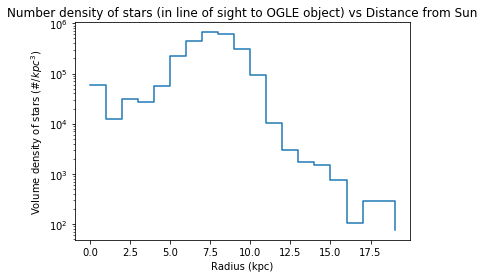

In [7]:
#volume = piece between r1 and r2 = (surveyArea/fullSky)*(4*pi/3)(r2^3 - r1^3)
radii = np.arange(21)
volumes = (0.34/41253)*(4*np.pi/3)*radii**3
patchvol = np.diff(volumes)

hist, binedges = np.histogram(radiusHC,bins=np.arange(21))
voldens = hist/patchvol
plt.plot(binedges[:-1], voldens, drawstyle='steps-post')
plt.xlabel("Radius (kpc)")
plt.ylabel("Volume density of stars (#/$kpc^3$)")
plt.yscale('log')
plt.title("Number density of stars (in line of sight to OGLE object) vs Distance from Sun")
plt.show()